In [1]:
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
df=pd.read_csv("full_data.csv")

In [3]:
df.head(10)

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
5,2020-01-05,Afghanistan,0,0,0,0
6,2020-01-06,Afghanistan,0,0,0,0
7,2020-01-07,Afghanistan,0,0,0,0
8,2020-01-08,Afghanistan,0,0,0,0
9,2020-01-09,Afghanistan,0,0,0,0


In [4]:
df.dtypes

date            object
location        object
new_cases        int64
new_deaths       int64
total_cases      int64
total_deaths     int64
dtype: object

In [5]:
df.describe()

,new_cases,new_deaths,total_cases,total_deaths
count,12093.000000,12093.000000,1.209300e+04,12093.000000
mean,389.622592,27.231622,6.912789e+03,395.080046
std,3850.597270,298.690193,7.384633e+04,4667.641199
min,-9.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1.000000e+00,0.000000
50%,1.000000,0.000000,1.800000e+01,0.000000
75%,23.000000,0.000000,3.060000e+02,5.000000
max,89349.000000,10345.000000,2.355853e+06,164656.000000


In [6]:
df.date=df.date.astype("datetime64")

In [7]:
df.dtypes

date            datetime64[ns]
location                object
new_cases                int64
new_deaths               int64
total_cases              int64
total_deaths             int64
dtype: object

In [8]:
df.isnull().sum()

date            0
location        0
new_cases       0
new_deaths      0
total_cases     0
total_deaths    0
dtype: int64

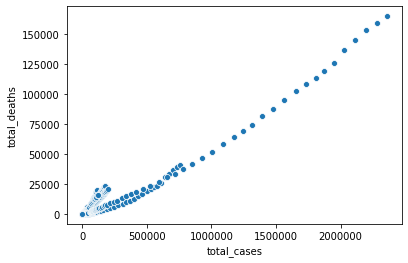

In [9]:
sns.scatterplot(x=df.total_cases,y=df.total_deaths)
plt.show()

Text(0.5, 0, 'Total positive cases')

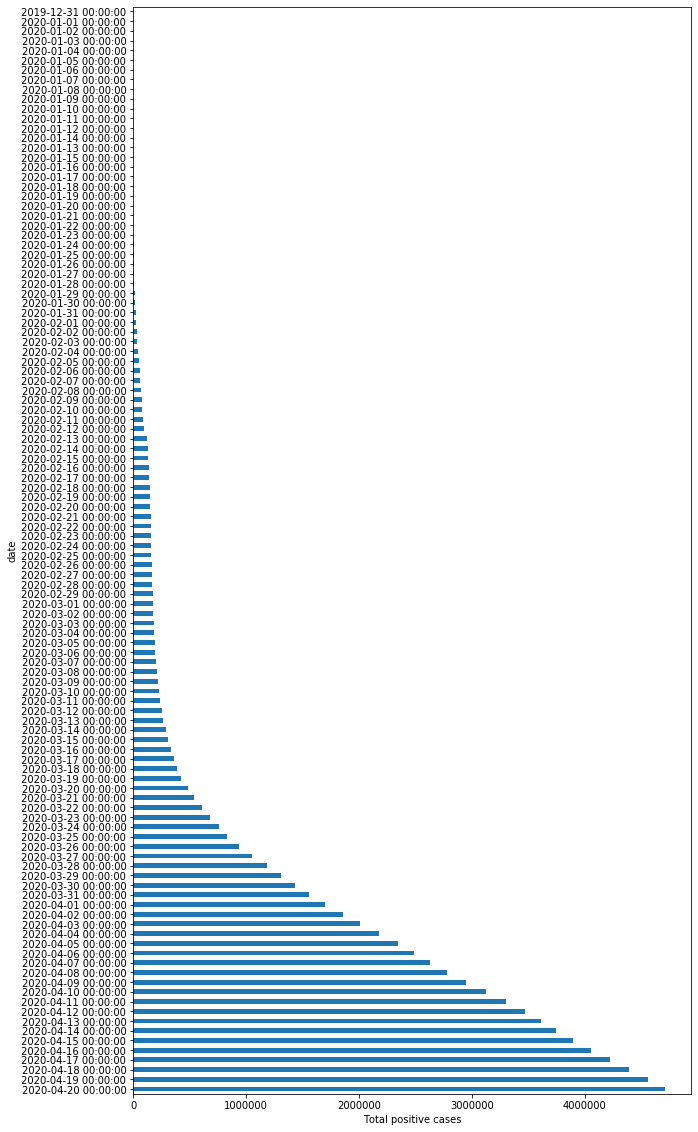

In [10]:
plt.subplots(figsize=(10,20))
df.groupby("date")["total_cases"].sum().sort_values(ascending=False).plot(kind='barh')
plt.xlabel("Total positive cases")

In [11]:
India=df[df["location"]=="India"]

In [12]:
India.head(10)

,date,location,new_cases,new_deaths,total_cases,total_deaths
4946,2019-12-31,India,0,0,0,0
4947,2020-01-01,India,0,0,0,0
4948,2020-01-02,India,0,0,0,0
4949,2020-01-03,India,0,0,0,0
4950,2020-01-04,India,0,0,0,0
4951,2020-01-05,India,0,0,0,0
4952,2020-01-06,India,0,0,0,0
4953,2020-01-07,India,0,0,0,0
4954,2020-01-08,India,0,0,0,0
4955,2020-01-09,India,0,0,0,0


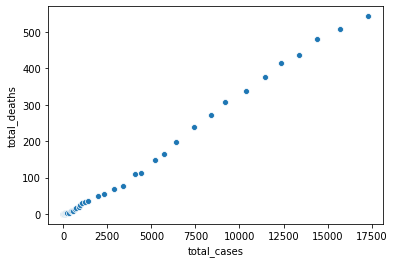

In [13]:
sns.scatterplot(x=India.total_cases,y=India.total_deaths)
plt.show()

Text(0.5, 0, 'Total positive cases')

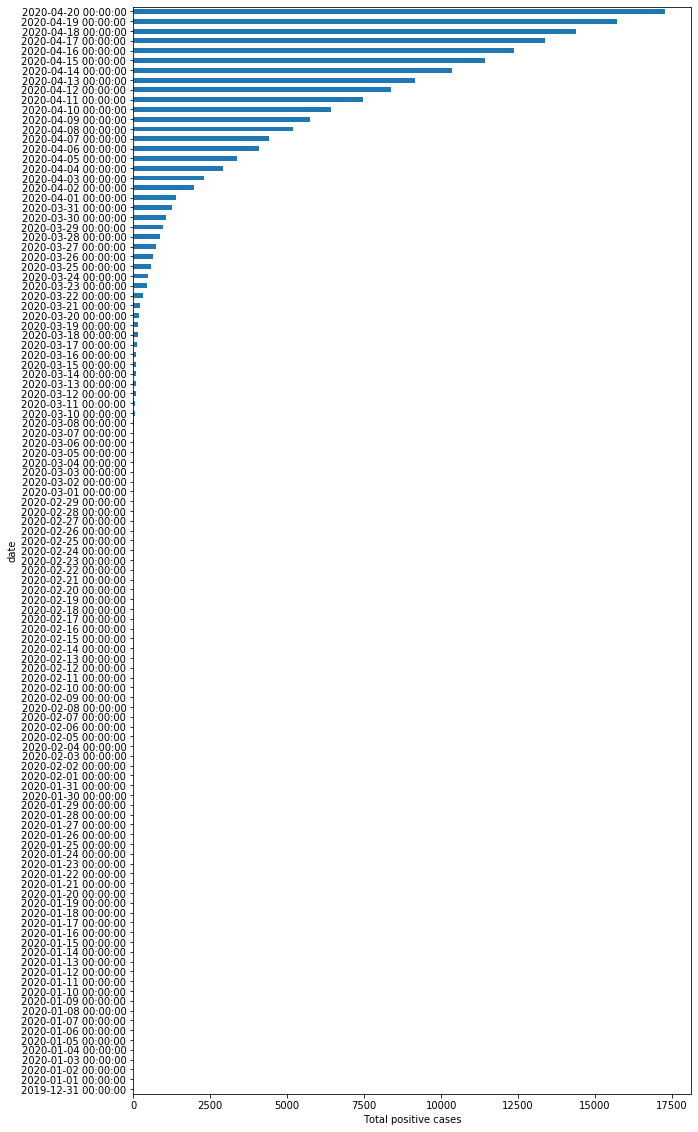

In [14]:
plt.subplots(figsize=(10,20))
India.groupby("date")["total_cases"].sum().plot(kind='barh')
plt.xlabel("Total positive cases")

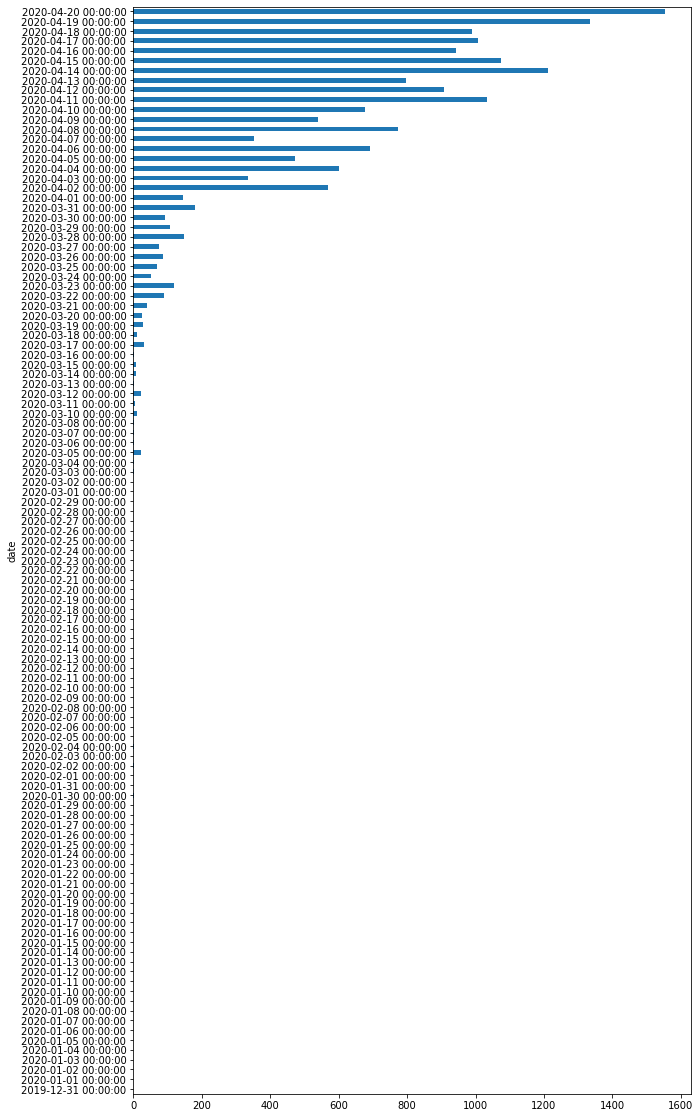

In [15]:
plt.subplots(figsize=(10,20))
India.groupby("date")["new_cases"].sum().plot(kind='barh')

In [16]:
China=df[df["location"]=="China"]

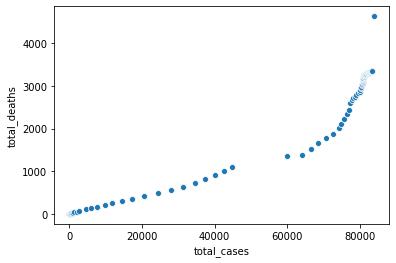

In [17]:
sns.scatterplot(x=China.total_cases,y=China.total_deaths)
plt.show()

Text(0.5, 0, 'Total positive cases')

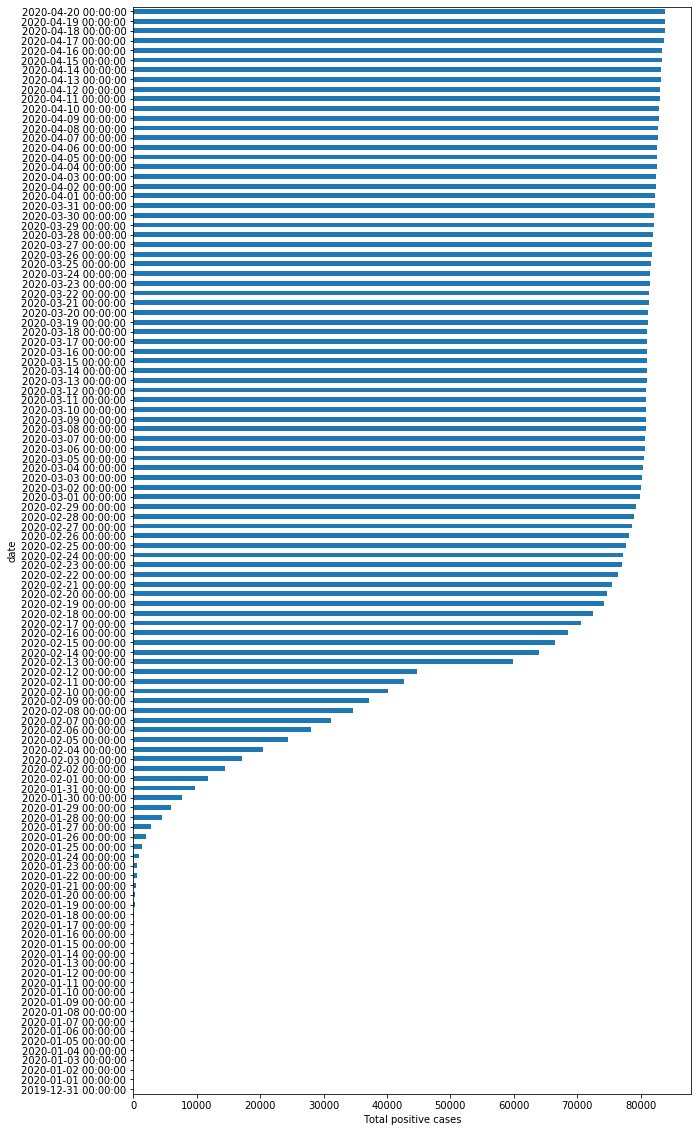

In [18]:
plt.subplots(figsize=(10,20))
China.groupby("date")["total_cases"].sum().plot(kind='barh')
plt.xlabel("Total positive cases")

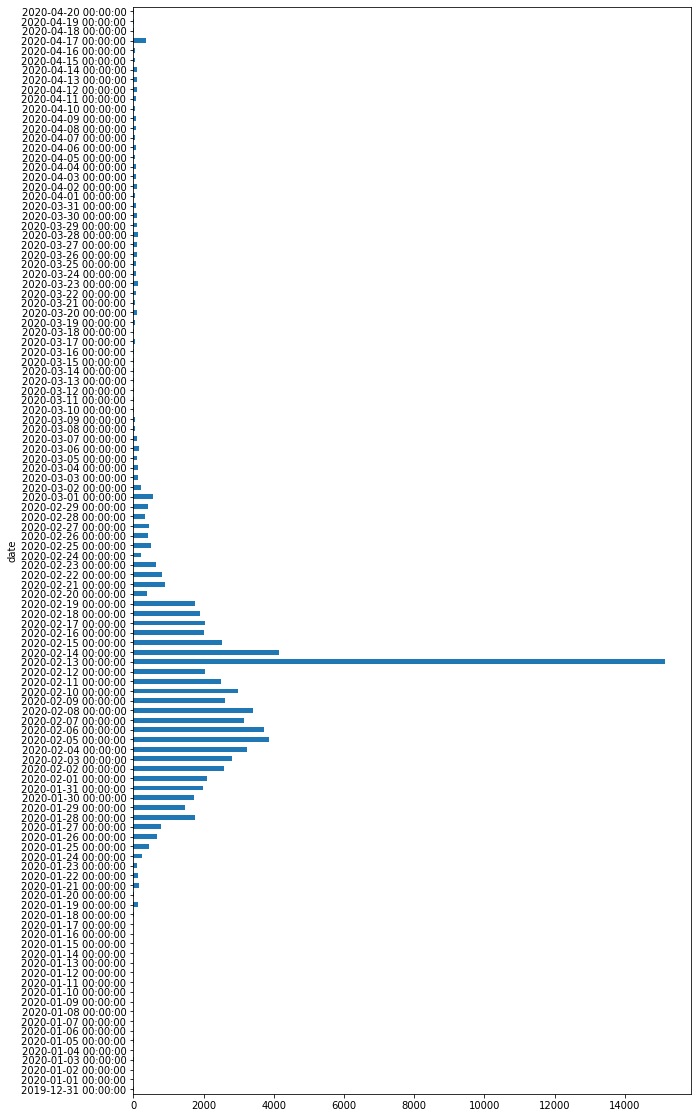

In [19]:
plt.subplots(figsize=(10,20))
China.groupby("date")["new_cases"].sum().plot(kind='barh')

In [20]:
India.dtypes

date            datetime64[ns]
location                object
new_cases                int64
new_deaths               int64
total_cases              int64
total_deaths             int64
dtype: object

In [21]:
India.shape

(111, 6)

In [51]:
X=India.drop(["new_cases","date","location"],axis=1)
y=India.new_cases

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [54]:
from statsmodels.formula.api import ols

In [55]:
import statsmodels.api as sm

In [56]:
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1403.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.03e-85
Time:                        19:17:09   Log-Likelihood:                -598.58
No. Observations:                 111   AIC:                             1205.
Df Residuals:                     107   BIC:                             1216.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.1318      5.849     -0.364      0.716     -13.728       9.464
new_deaths      11.0961      1.097     10.117      0.000       8.922      13.270
total_cases      0.2671      0.025     10.808      0.000       0.218       0.316
total_deaths    -6.4402      0.746     -8.639      0.000      -7.918      -4.962
==============================================================================
Omnibus:                       50.118   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              639.147
Skew:                           1.003   Prob(JB):                    1.63e-139
Kurtosis:                      14.583   Cond. No.                     4.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# To retrive the intercept
print("Intercept is:",regressor.intercept_)

# To retrive the coefficent
print("Coefficent is:",regressor.coef_)

Intercept is: -0.29038214248541294
Coefficent is: [ 9.7771739   0.17559479 -3.42686001]


In [60]:
y_prediction=regressor.predict(X_test)
y_prediction

array([ 7.43347883e+02,  8.93481306e+02, -2.90382142e-01, -2.90382142e-01,
        2.36402217e-01,  1.27501389e+02, -2.90382142e-01,  6.08074302e-02,
        7.48148605e+01,  2.36402217e-01, -2.90382142e-01,  1.29993713e+03,
        1.72074390e+01,  3.20067981e+02,  1.39050697e+02, -2.90382142e-01,
       -2.90382142e-01,  4.16292771e+02,  2.36402217e-01,  3.93585294e+02,
        2.36402217e-01, -2.90382142e-01,  2.93179559e+01, -2.90382142e-01,
        2.36402217e-01,  5.67984059e+00,  2.36402217e-01, -2.90382142e-01,
        2.65645735e+01,  8.79431406e+02,  2.36402217e-01, -2.90382142e-01,
        2.36402217e-01,  8.21392307e+01])

In [62]:
# Now compare the actual output values for X_test with the predicted values

df1=pd.DataFrame({"Actual":y_test.flatten(),"Prediction":y_prediction.flatten()})
df1

AttributeError: 'Series' object has no attribute 'flatten'